In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets, random_projection 
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of random variables (features) under consideration. The process of dimensionality reduction has a variety of applications and is used throughout the domain of data mining. Here we will explore the concepts behind Prinicpal Component Analysis (PCA), and step through a couple of examples. 
- The first example is the canonical PCA example.
- We will also examine the handwritten digits dataset, specifically clustering by prinicpal components.
- Finally, the class will implement PCA on the Iris dataset

### PCA: Take a teapot, how can I rotate it to give the most information to an observer?

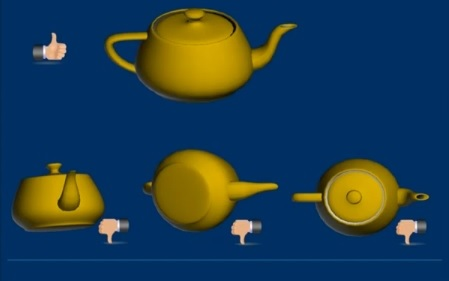

In [104]:
Image(filename="data/teapot1.jpg")

# PCA example

### Make a random dataset

In [ ]:
cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
print 'cov: \n{}'.format(cov)

#Makes a random set of data (drawing from a multivariate normal distribution)
#Get 2-dimensional data with 500 rows (500X2 matrix)
#The mean of rows is [1,2]
#Covariance matrix of the distribution is cov
norm_dist = np.random.multivariate_normal([1,2], cov, size=500)  
print 'norm_dist: \n{}...'.format(norm_dist[:10])

In [ ]:
# check if norm_dist has the expected mean and covariance
print 'mean: \n{}'.format(np.mean(norm_dist, axis=0))
print 'covairance: \n{}'.format(np.cov(norm_dist.T))

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

ax.scatter(norm_dist[:,0], norm_dist[:,1], color='r')
ax.axis('equal') # equal scaling on both axis;

### We would now like to analyze the directions in which the data varies most. 

##### For that, we place the point cloud in the center (0,0) and rotate a line through the data, such that the direction with most variance is parallel to the x-axis. Each succeding component in turn accounts for the highest variance possible that is orthoganal to existing components.

Now, let's perform principal component analysis (PCA) to project the data into fewer dimensions. In PCA, the projection is defined by principal components (eigenvectors), each of which can be viewed as a linear combination of the original features that corresponds to a dimension in the projection. The projection is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components. Each principal component (eigenvector) is associated with an eigenvalue, which corresponds to the amount of the variance explained by that component.

Dimensionality reduction is a one-way transformation that induces a loss of information. We can try to minimize the loss of information while retaining the benefits of dimensionality reduction by trying to find the number of principal components needed to effectively represent the original dataset. This number can often be determined by the "elbow" or "knee" point, which is considered to be the natural break between the useful principal components (or dimensions) and residual noise. We can find the elbow point by computing PCA on our dataset and observing the number of principal components after which the amount of variance explained displays a natural break or drop-off.

# First principal component

In [ ]:
pca = PCA(n_components=1)
norm_dist_pca = pca.fit_transform(norm_dist)  #Transform the data into this dimension

## Explore the data

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,2,1)
ax.scatter(norm_dist[:,0], norm_dist[:,1], color='r')
ax.axis('equal') # equal scaling on both axis;
ax.set_title('Original', size=24)

ax = fig.add_subplot(1,2,2)
ax.scatter(norm_dist_pca[:,0], [1 for x in norm_dist_pca[:,0]], color='g')
ax.set_title('First Component', size=32)
ax.set_yticklabels([])
#ax.set_ylim()

## How much of the datasets variation is explained by the first component?

In [ ]:
tgexplained_variance_pct = float(pca.explained_variance_ratio_) * 100
print "{:.1f}% of the data is explained by the first principal component""".format(explained_variance_pct)

# Class exercise

### Plot the transformed dataset using the first two principal components

- How much variance is explained using the first two components?
- Does the explained variance number make sense?

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,2,1)
ax.scatter(norm_dist[:,0], norm_dist[:,1], color='r')
ax.axis('equal') # equal scaling on both axis;
ax.set_title('Original', size=24)

ax = fig.add_subplot(1,2,2)
#Fill this part in with the transformed data
ax.axis('equal') # equal scaling on both axis;
ax.set_title('Transformed', size=24)

# Multidimensional Data

In [ ]:
digits = datasets.load_digits(n_class=6) # load the dataset with 6 classes (digits 0 through 5)
X = pd.DataFrame(digits.data) # explanatory (or independent or feature) variables
y = pd.Series(digits.target) # target (or dependent or class) variable
n_samples, n_features = X.shape # the number of rows (samples) and columns (features)

## What does this dataset look like?

In [ ]:
n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X.ix[i*n_img_per_row + j].reshape((8, 8)) # set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8)

plt.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
plt.imshow(img, cmap=plt.cm.binary) # show the image using a binary color map
plt.xticks([]) # no x ticks
plt.yticks([]) # no y ticks
print

### Generally, PCA requires centering the data (i.e., subtracting the mean from each data point for each feature), because otherwise the first component may not truly describe the largest direction of variation in the data, but rather the mean of the data.

In [ ]:
#pca centers the data with unit variance - therefore:
np.round(norm_dist_pca.mean(axis=0))

In [ ]:
# global centering
X_centered = X - X.mean()

# print again
n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X_centered.ix[i*n_img_per_row + j].reshape((8, 8)) # set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8)

plt.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
plt.imshow(img, cmap=plt.cm.binary) # show the image using a binary color map
plt.xticks([]) # no x ticks
plt.yticks([]) # no y ticks
print

## Variance explained by number of components

In [ ]:
pca = PCA(n_components=64)
X_pca = pca.fit_transform(X_centered)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
#ax.plot([x for x in range(len(pca.explained_variance_ratio_))],np.cumsum(pca.explained_variance_ratio_))

ax.set_title("Explained variance", size=32)
ax.set_ylabel("Percent explained", size=24)
ax.set_xlabel("Principal Component", size=24);

Dimensionality reduction is a one-way transformation that induces a loss of information. We can try to minimize the loss of information while retaining the benefits of dimensionality reduction by trying to find the number of principal components needed to effectively represent the original dataset. This number can often be determined by the "elbow" or "knee" point, which is considered to be the natural break between the useful principal components (or dimensions) and residual noise. We can find the elbow point by computing PCA on our dataset and observing the number of principal components after which the amount of variance explained displays a natural break or drop-off.

## Lets look at the first 2 components

In [ ]:
#It's easy to represent 2 elements in a plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

print "{:.2f}% variance explained by the first {} components".format((np.sum(pca.explained_variance_ratio_) * 100), 2)

In [ ]:
def plot_embedding(X, title=None):
    # min-max normalization
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

## Random 2 elements

In [ ]:
# Random 2D projection using a random unitary matrix

#print("Computing random projection"),
rp = random_projection.SparseRandomProjection(n_components=2, random_state=0)
X_projected = rp.fit_transform(X)
#print("done.")

# Plot random projection result
plot_embedding(X_projected, "Random Projection of the Digits Dataset\n")

## First 2 principal components

In [ ]:
plot_embedding(X_pca, "2 components")

### This is unsupervised learning

- PCA has no information about the classes, but provides insight into the distribution of different numbers in the parameter space
- 0 and 4 tend to be more distinct then 1, 2, 5
- Does this make sense?

## Class exercise

In [ ]:
iris = datasets.load_iris()

- PCA is performed using linear combinations of the original features using a truncated Singular Value Decomposition of the matrix X so as to project the data onto a base of the top singular vectors. If the number of retained components is 2 or 3, PCA can be used to visualize the dataset.

In [ ]:
# get X

# Transform the data


In [ ]:
# Perform PCA with the first two components


In [ ]:
#Useful plotting function (lifted from Alessandro)
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

In [ ]:
# add your transformed X and plot
plot_PCA_2D(???, target=iris.target, target_names=iris.target_names)

In [ ]:
#What can you observe about this dataset

In [ ]:
# Exercise 1: If you finish try running the above with a randomized PCA
from sklearn.decomposition import RandomizedPCA


http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html

In [ ]:
# Exercise 2: visualize 3 PCA components and visualize


http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html